# Matplotlib

## Intro

Matplotlib는 Python 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리입니다. 그래프 제작에 사용되는 low level 라이브러리입니다.

## Practice

### Library

In [1]:
!pip install wordcloud
!pip install matplotlib_venn
!pip install squarify
!pip install soynlp

  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32154 sha256=7f82564e9ad33a560ef74b6f32273eec11e307cb32f5bd04a5b6817f1eb5e598
  Stored in directory: c:\users\phong\appdata\local\pip\cache\wheels\fb\24\13\4c7b7f4121843c2fc7c5d6b4b1e3ab57be33428997761f996f
Successfully built matplotlib-venn


In [2]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib_venn as venn
import squarify
from sklearn import preprocessing
from scipy import stats
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from soynlp.noun import LRNounExtractor_v2

### Set Font

In [3]:
# Windows
font_path = "C:/Windows/Fonts/malgun.ttf" # any font you want
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# MacOS
'''
rc('font', family='AppleGothic')
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf' # run code to find path : [f.fname for f in font_manager.fontManager.ttflist if 'AppleGothic' in f.name]
plt.rcParams['axes.unicode_minus'] = False
'''

"\nrc('font', family='AppleGothic')\nfont_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf' # run code to find path : [f.fname for f in font_manager.fontManager.ttflist if 'AppleGothic' in f.name]\nplt.rcParams['axes.unicode_minus'] = False\n"

### Load Data

In [10]:
pip install pandas==1.3.4

  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.3
    Uninstalling pandas-1.3.3:
      Successfully uninstalled pandas-1.3.3
Note: you may need to restart the kernel to use updated packages.


In [11]:
FOLDER = ''
df = pd.read_pickle(FOLDER + 'df_movie_basic_clean.pickle')
df_hotel = pd.read_pickle(FOLDER + 'df_hotel_clean.pickle')
df_comment = pd.read_pickle(FOLDER + 'df_comment_clean.pickle')

AttributeError: Can't get attribute 'new_block' on <module 'pandas.core.internals.blocks' from 'C:\\Users\\phong\\Anaconda3\\lib\\site-packages\\pandas\\core\\internals\\blocks.py'>

### Histogram

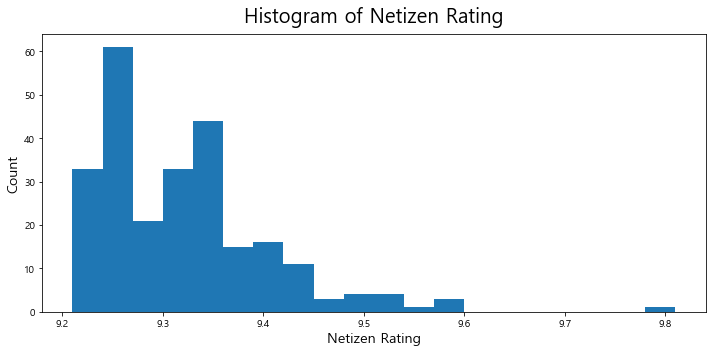

In [91]:
df_score = df['score_netizen']

plt.figure(figsize=(10, 5))
plt.hist(df_score, bins=20)
plt.xlabel('Netizen Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Histogram of Netizen Rating', size=20, y=1.02)
plt.tight_layout()
plt.draw()

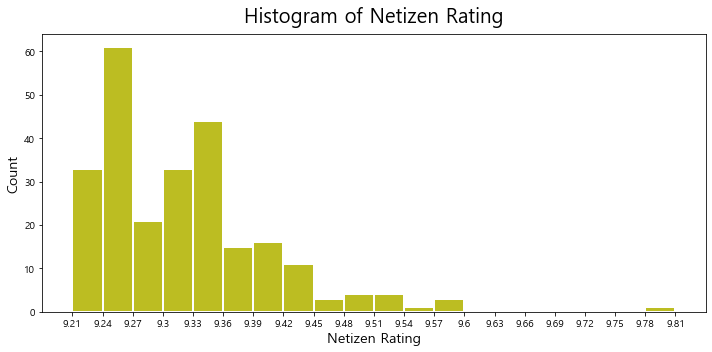

In [92]:
df_score = df['score_netizen']

plt.figure(figsize=(10, 5))
hist = plt.hist(df_score, bins=20, linewidth=2, edgecolor='white', color='tab:olive')
plt.xticks(hist[1], hist[1].astype(float).round(2))
plt.xlabel('Netizen Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Histogram of Netizen Rating', size=20, y=1.02)
plt.tight_layout()
plt.draw()

### Bar Chart

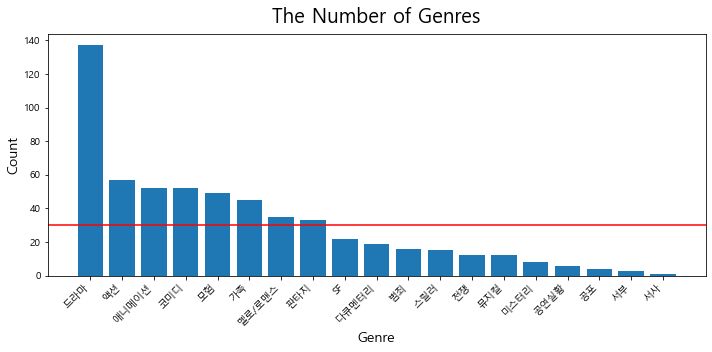

In [88]:
df_genre = df.explode('genre')
sr_counts = df_genre['genre'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(range(19), sr_counts)
plt.axhline(sr_counts.mean(), color='red')
plt.xticks(range(19), sr_counts.index, rotation=45, ha='right')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Number of Genres', size=20, y=1.02)
plt.tight_layout()
plt.draw()

### Line Chart

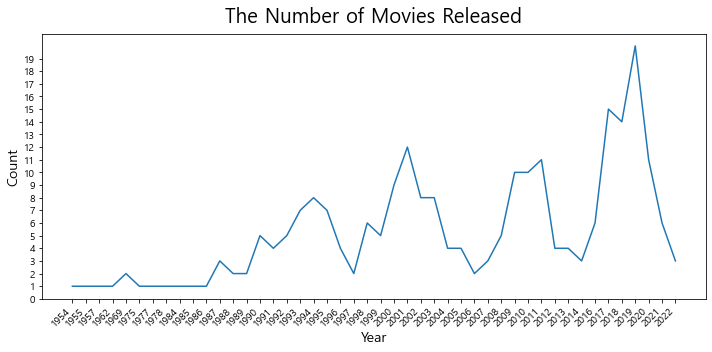

In [38]:
sr_count_by_time = df.groupby(df['day_opening'].dt.year).count()['id_movie']
sr_count_by_time.index = sr_count_by_time.index.astype(int)
# sr_count_by_time = pd.Series([sr_count_by_time.loc[year] if year in sr_count_by_time.index else 0 for year in range(1954, 2023)], index=range(1954, 2023))

plt.figure(figsize=(10, 5))
plt.plot(range(len(sr_count_by_time.index)), sr_count_by_time)
plt.xticks(range(len(sr_count_by_time.index)), sr_count_by_time.index, rotation=45, ha='right')
plt.yticks(range(sr_count_by_time.max()), range(sr_count_by_time.max()))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Number of Movies Released', size=20, y=1.02)
plt.tight_layout()
plt.draw()

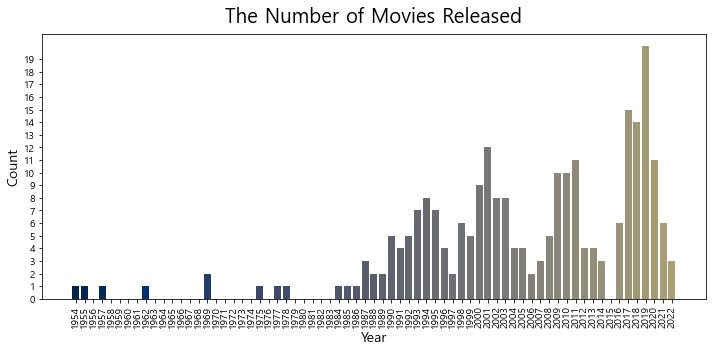

In [90]:
sr_count_by_time = df.groupby(df['day_opening'].dt.year).count()['id_movie']
sr_count_by_time.index = sr_count_by_time.index.astype(int)
sr_count_all_time = pd.Series([sr_count_by_time.loc[year] if year in sr_count_by_time.index else 0 for year in range(1954, 2023)], index=range(1954, 2023))

color = cm.cividis(np.linspace(0, 1, 100)) # https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.figure(figsize=(10, 5))
plt.bar(range(len(sr_count_all_time.index)), sr_count_all_time, color=color)
plt.xticks(range(len(sr_count_all_time.index)), sr_count_all_time.index, rotation=90, ha='center')
plt.yticks(range(sr_count_all_time.max()), range(sr_count_all_time.max()))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Number of Movies Released', size=20, y=1.02)
plt.tight_layout()
plt.draw()

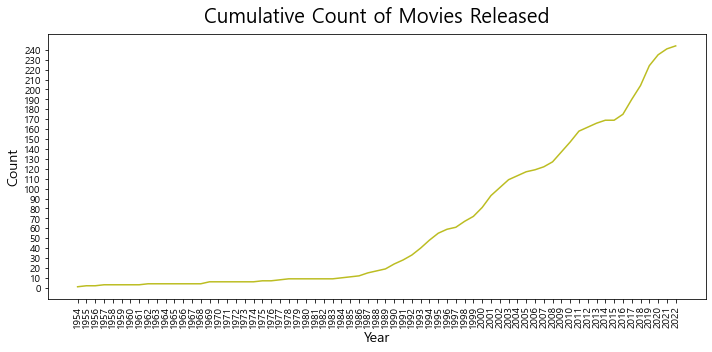

In [40]:
sr_count_by_time = df.groupby(df['day_opening'].dt.year).count()['id_movie']
sr_count_by_time.index = sr_count_by_time.index.astype(int)
sr_count_all_time = pd.Series([sr_count_by_time.loc[year] if year in sr_count_by_time.index else 0 for year in range(1954, 2023)], index=range(1954, 2023))
sr_count_all_time_cumsum = sr_count_all_time.cumsum()
plt.figure(figsize=(10, 5))
plt.plot(range(len(sr_count_all_time_cumsum.index)), sr_count_all_time_cumsum, color='tab:olive')
plt.xticks(range(len(sr_count_all_time_cumsum.index)), sr_count_all_time_cumsum.index, rotation=90, ha='center')
plt.yticks(range(0, sr_count_all_time_cumsum.max(), 10), range(0, sr_count_all_time_cumsum.max(), 10))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Cumulative Count of Movies Released', size=20, y=1.02)
plt.tight_layout()
plt.draw()

### Area Chart

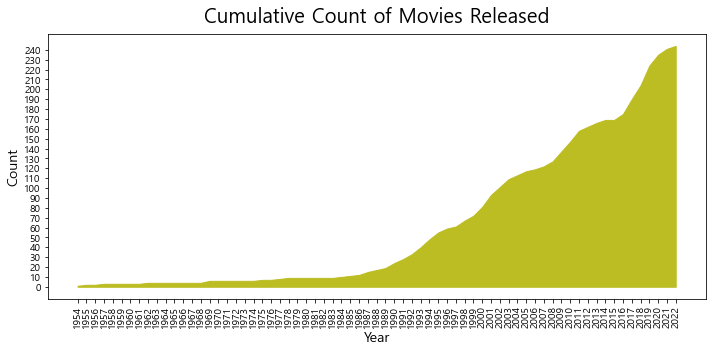

In [55]:
sr_count_by_time = df.groupby(df['day_opening'].dt.year).count()['id_movie']
sr_count_by_time.index = sr_count_by_time.index.astype(int)
sr_count_all_time = pd.Series([sr_count_by_time.loc[year] if year in sr_count_by_time.index else 0 for year in range(1954, 2023)], index=range(1954, 2023))
sr_count_all_time_cumsum = sr_count_all_time.cumsum()

plt.figure(figsize=(10, 5))
plt.fill_between(range(len(sr_count_all_time_cumsum.index)), sr_count_all_time_cumsum, color='tab:olive')
plt.xticks(range(len(sr_count_all_time_cumsum.index)), sr_count_all_time_cumsum.index, rotation=90, ha='center')
plt.yticks(range(0, sr_count_all_time_cumsum.max(), 10), range(0, sr_count_all_time_cumsum.max(), 10))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Cumulative Count of Movies Released', size=20, y=1.02)
plt.tight_layout()
plt.draw()

### Stacked Area Chart

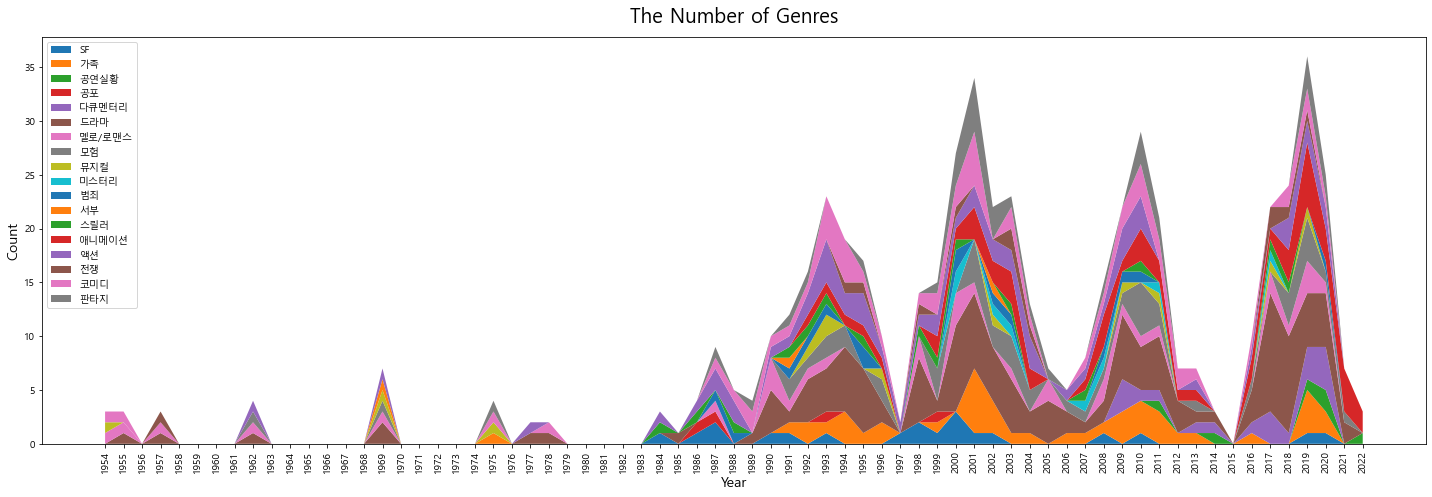

In [57]:
df_select = df.explode('genre')[['day_opening', 'genre', 'id_movie']]
df_pivot = df_select.pivot_table(index=df['day_opening'].dt.year, columns='genre', values='id_movie', aggfunc=lambda x: len(x))
df_pivot = df_pivot.fillna(0).astype(int)
df_pivot = pd.DataFrame([df_pivot.loc[year].values if year in df_pivot.index else [0] * len(df_pivot.columns) for year in range(1954, 2023)], index=range(1954, 2023), columns=df_pivot.columns) # fill the omitted time stamps

plt.figure(figsize=(20, 7))
plt.stackplot(range(len(df_pivot.index)), df_pivot.T, labels=df_pivot.columns)
plt.xticks(range(len(df_pivot.index)), df_pivot.index, rotation=90, ha='center')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Number of Genres', size=20, y=1.02)
plt.legend(loc='upper left')
plt.tight_layout()
plt.draw()

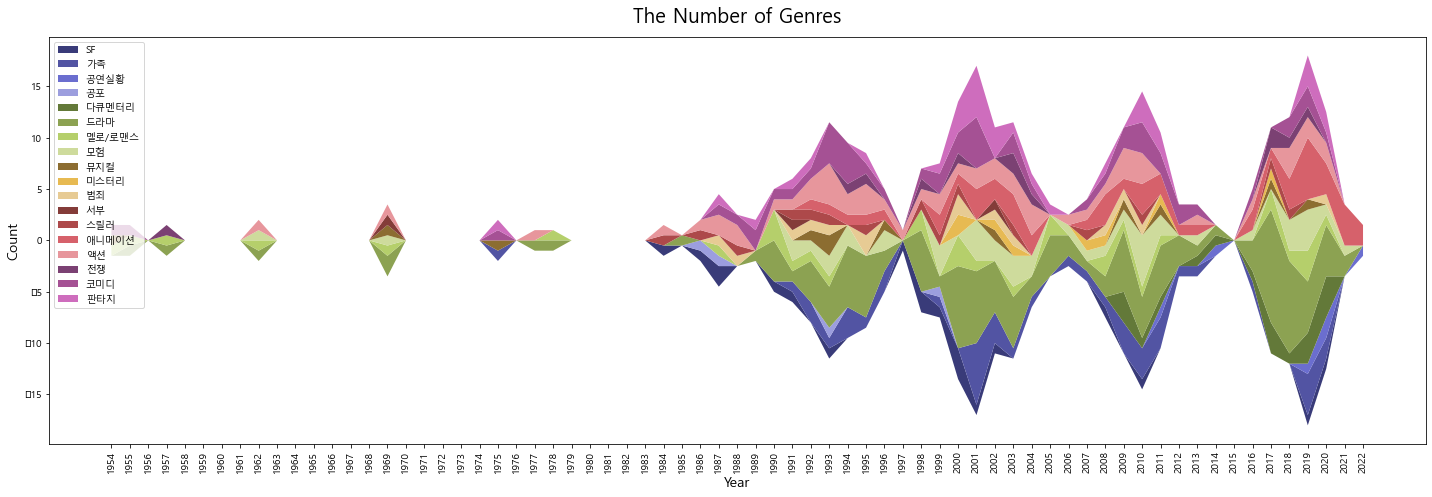

In [53]:
df_select = df.explode('genre')[['day_opening', 'genre', 'id_movie']]
df_pivot = df_select.pivot_table(index=df['day_opening'].dt.year, columns='genre', values='id_movie', aggfunc=lambda x: len(x))
df_pivot = df_pivot.fillna(0).astype(int)
df_pivot = pd.DataFrame([df_pivot.loc[year].values if year in df_pivot.index else [0] * len(df_pivot.columns) for year in range(1954, 2023)], index=range(1954, 2023), columns=df_pivot.columns)

color = cm.tab20b(np.linspace(0, 1, 19))
plt.figure(figsize=(20, 7))
plt.stackplot(range(len(df_pivot.index)), df_pivot.T, baseline='sym', colors=color, labels=df_pivot.columns)
plt.xticks(range(len(df_pivot.index)), df_pivot.index, rotation=90, ha='center')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Number of Genres', size=20, y=1.02)
plt.legend(loc='upper left')
plt.tight_layout()
plt.draw()


C:\Users\dlack\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlack\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


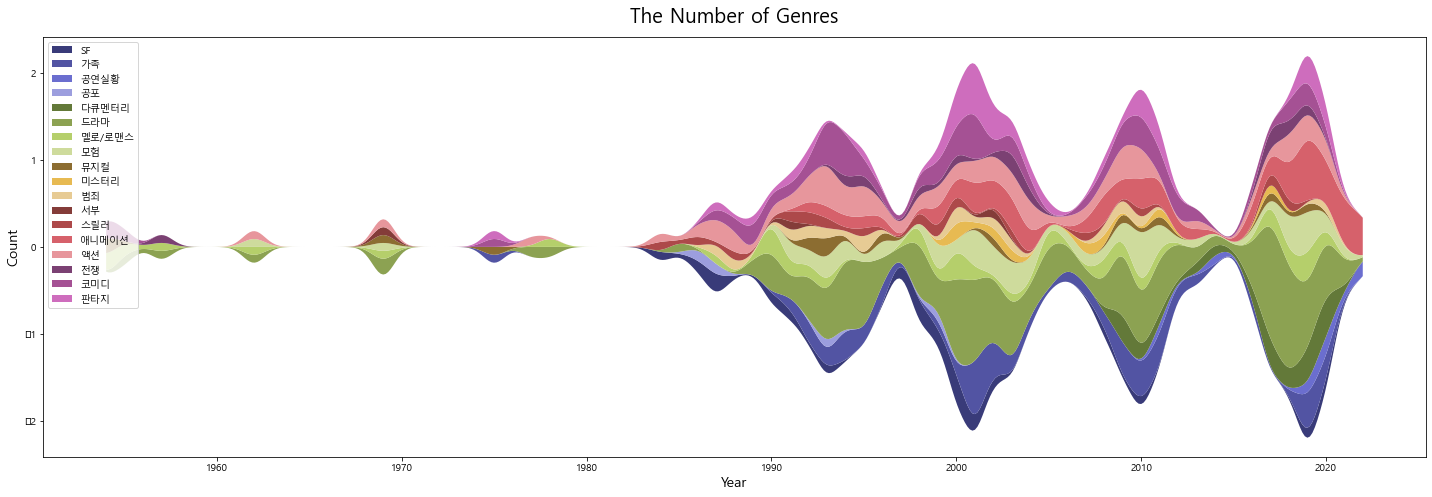

In [93]:
def gaussian_smooth(x, y_, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x]) # (#grid, N)
    # weights.shape
    weights = weights / weights.sum(0)
    return (weights * y_).sum(1)

df_select = df.explode('genre')[['day_opening', 'genre', 'id_movie']]
df_pivot = df_select.pivot_table(index=df['day_opening'].dt.year, columns='genre', values='id_movie', aggfunc=lambda x: len(x))
df_pivot = df_pivot.fillna(0).astype(int)
grid = np.linspace(1954, 2022, num=500)
y_smoothed = [gaussian_smooth(df_pivot.index, y_, grid, sd=0.6) for y_ in df_pivot.T.to_numpy()]

color = cm.tab20b(np.linspace(0, 1, 19))
plt.figure(figsize=(20, 7))
plt.stackplot(grid, y_smoothed, baseline='sym', colors=color, labels=df_pivot.columns)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Number of Genres', size=20, y=1.02)
plt.legend(loc='upper left')
plt.tight_layout()
plt.draw()


### Scatter Plot

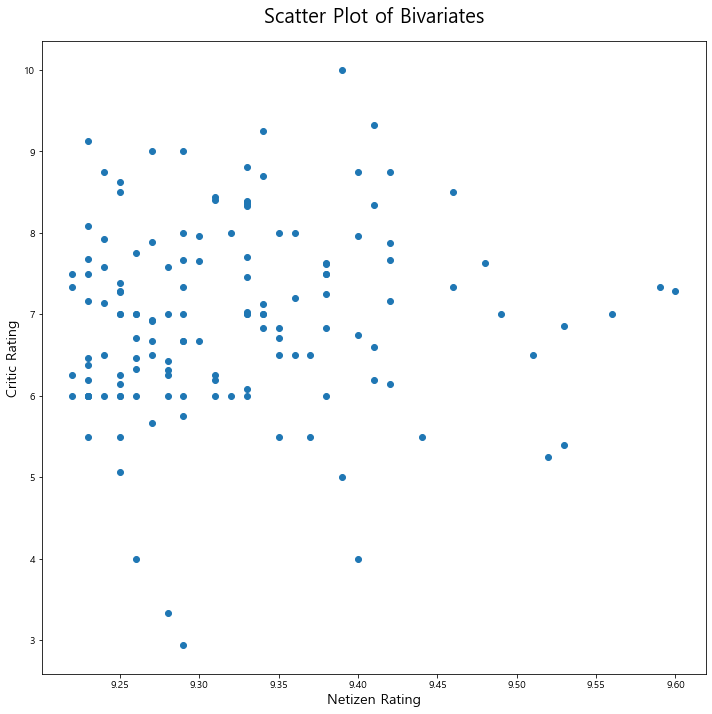

In [96]:
df_score = df[['score_netizen', 'score_critic']].dropna()

plt.figure(figsize=(10, 10))
plt.scatter(df_score['score_netizen'], df_score['score_critic'])
plt.xlabel('Netizen Rating', fontsize=14)
plt.ylabel('Critic Rating', fontsize=14)
plt.title('Scatter Plot of Bivariates', size=20, y=1.02)
plt.tight_layout()
plt.draw()

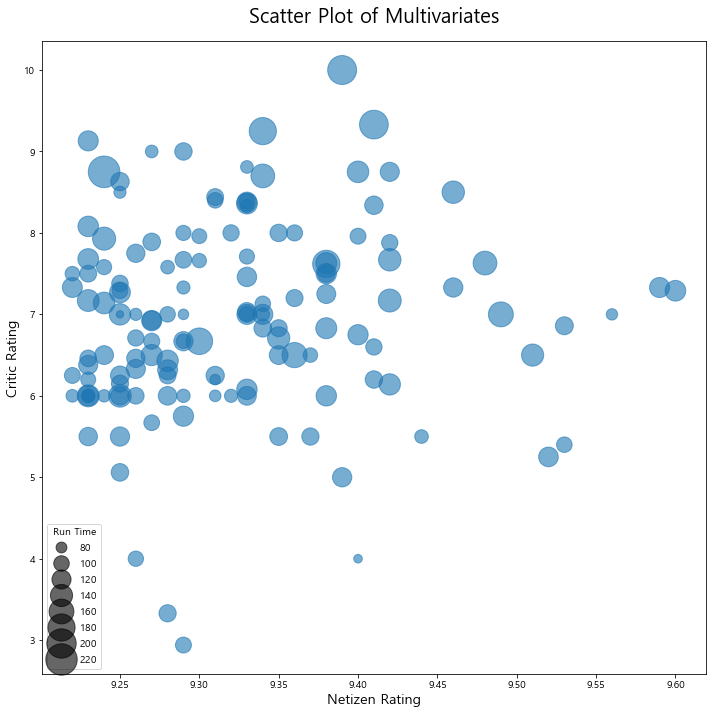

In [95]:
df_score = df[['score_netizen', 'score_critic', 'run_time']].dropna()
run_time = df_score['run_time']
scale_up = lambda scores: preprocessing.minmax_scale(scores) * 1000
scale_down = lambda score: score / 1000 * (run_time.max() - run_time.min()) + run_time.min()

plt.figure(figsize=(10, 10))
scatter = plt.scatter(df_score['score_netizen'], df_score['score_critic'], s=scale_up(run_time), alpha=0.6)
plt.xlabel('Netizen Rating', fontsize=14)
plt.ylabel('Critic Rating', fontsize=14)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, func=scale_down)
plt.legend(handles, labels, loc="lower left", title="Run Time")
plt.title('Scatter Plot of Multivariates', size=20, y=1.02)
plt.tight_layout()
plt.draw()

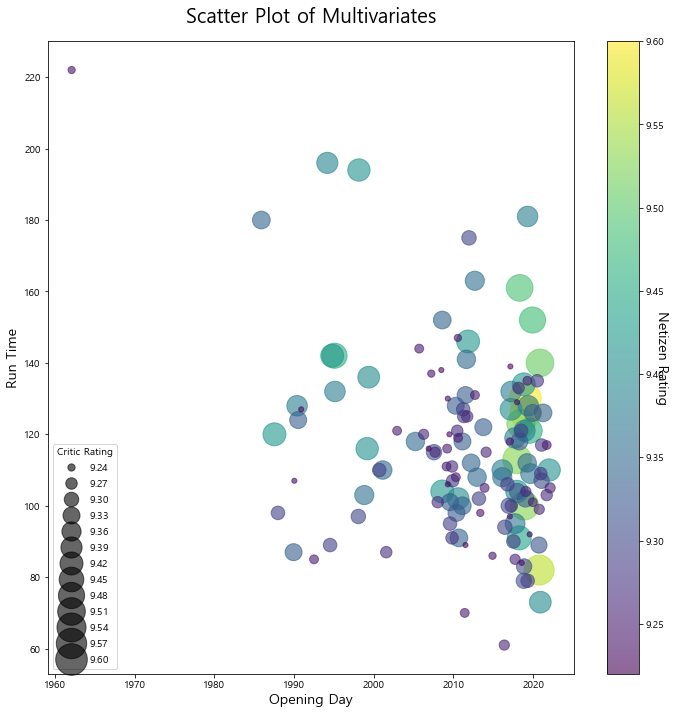

In [94]:
df_score = df[['day_opening', 'score_netizen', 'score_critic', 'run_time']].dropna()
score_netizen = df_score['score_netizen']
score_critic = df_score['score_netizen']
scale_up = lambda scores: preprocessing.minmax_scale(scores) * 1000
scale_down = lambda score: score / 1000 * (score_critic.max() - score_critic.min()) + score_critic.min()

plt.figure(figsize=(10, 10))
scatter = plt.scatter(df_score['day_opening'], df_score['run_time'], s=preprocessing.minmax_scale(score_critic) * 1000, c=score_netizen, alpha=0.6)
plt.xlabel('Opening Day', fontsize=14)
plt.ylabel('Run Time', fontsize=14)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Netizen Rating', rotation=270, size=14)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, func=scale_down)
plt.legend(handles, labels, loc="lower left", title="Critic Rating")
plt.title('Scatter Plot of Multivariates', size=20, y=1.02)
plt.tight_layout()
plt.draw()

### Heatmap

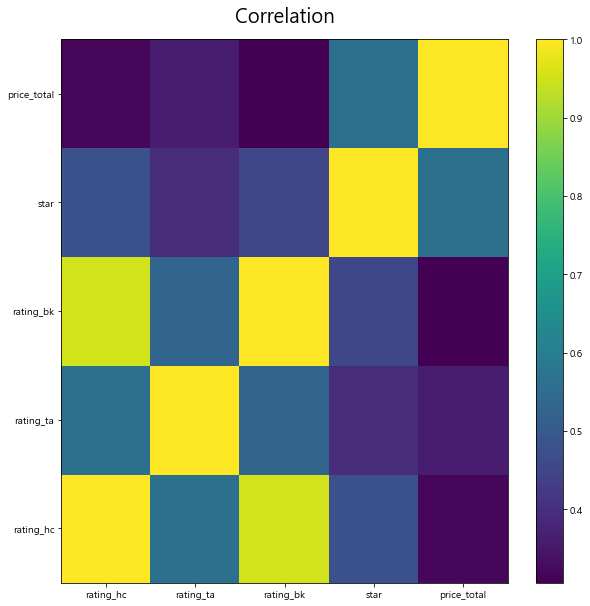

In [61]:
df_corr = df_hotel[['rating_hc', 'rating_ta', 'rating_bk', 'star', 'price_total']].dropna().astype(float).corr()

plt.figure(figsize=(10, 10))
plt.pcolor(df_corr)
plt.xticks(np.arange(0.5, len(df_corr.columns), 1), df_corr.columns)
plt.yticks(np.arange(0.5, len(df_corr.index), 1), df_corr.index)
plt.title('Correlation', size=20, y=1.02)
plt.colorbar()
plt.draw()

### Hexbin

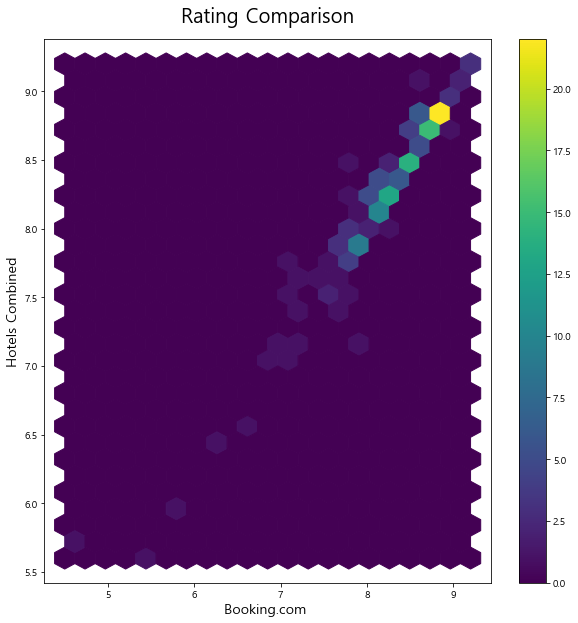

In [62]:
df_star_price = df_hotel[['rating_bk', 'rating_hc']].dropna().astype(float)

plt.figure(figsize=(10, 10))
plt.hexbin(df_star_price['rating_bk'], df_star_price['rating_hc'], gridsize=(20, 15))
plt.xlabel('Booking.com ', fontsize=14)
plt.ylabel('Hotels Combined', fontsize=14)
plt.title('Rating Comparison', size=20, y=1.02)
plt.colorbar()
plt.draw()

### KDE

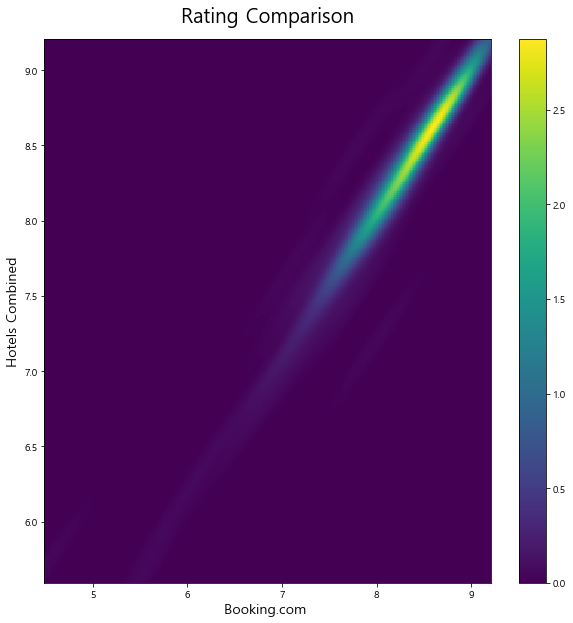

In [63]:
df_star_price = df_hotel[['rating_bk', 'rating_hc']].dropna().astype(float)
x = df_star_price['rating_bk']
y = df_star_price['rating_hc']
nbins=300
k = stats.kde.gaussian_kde([x, y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

plt.figure(figsize=(10, 10))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.xlabel('Booking.com ', fontsize=14)
plt.ylabel('Hotels Combined', fontsize=14)
plt.title('Rating Comparison', size=20, y=1.02)
plt.colorbar()
plt.draw()

### Radar Chart

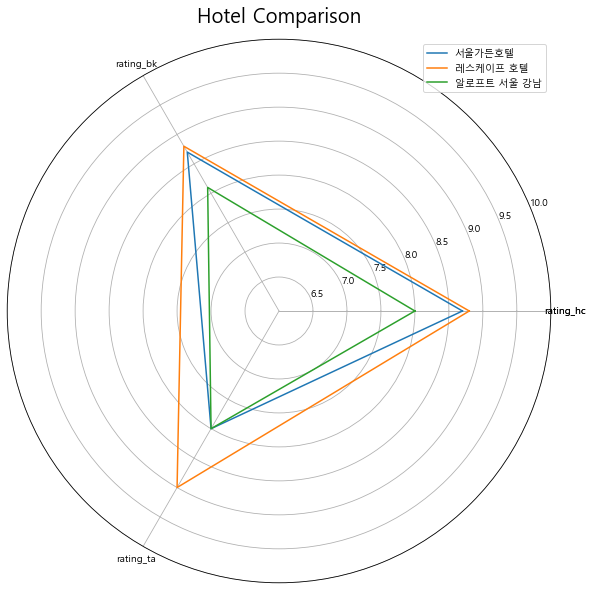

In [64]:
df_rating = df_hotel[['name', 'rating_hc', 'rating_bk', 'rating_ta']].dropna().reset_index(drop=True).sample(3)
list_category = ['rating_hc', 'rating_bk', 'rating_ta']
list_category = [*list_category, list_category[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(list_category))
plt.figure(figsize=(10, 10))
plt.subplot(polar=True)
for i, row in df_rating.iterrows():
    plt.plot(label_loc, row[list_category].to_list(), label=row['name'])
plt.ylim(6, 10)
plt.title('Hotel Comparison', size=20, y=1.02)
plt.thetagrids(np.degrees(label_loc), labels=list_category)
plt.legend()
plt.draw()

### Pie Chart

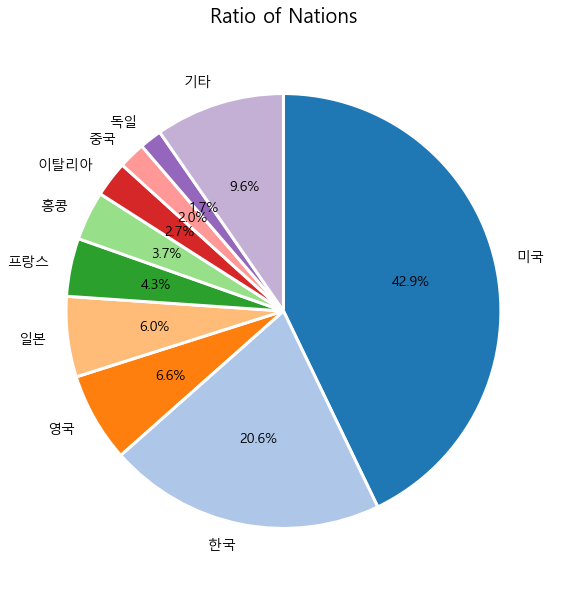

In [69]:
sr_nation = df.explode('nation')['nation'].value_counts()
others = sr_nation[9:].sum()
sr_nation = pd.concat([sr_nation[:9], pd.Series(others, index=['기타'])])

color = cm.tab20.colors
plt.figure(figsize=(10, 10), facecolor='white')
plt.pie(sr_nation, labels=sr_nation.index, labeldistance=1.1, wedgeprops={'linewidth': 3, 'edgecolor': 'white'}, textprops={'size': 14}, autopct='%.1f%%', startangle=90, counterclock=False, colors=color)
plt.title('Ratio of Nations', size=20, y=1.02)
plt.draw()

### Donut Chart

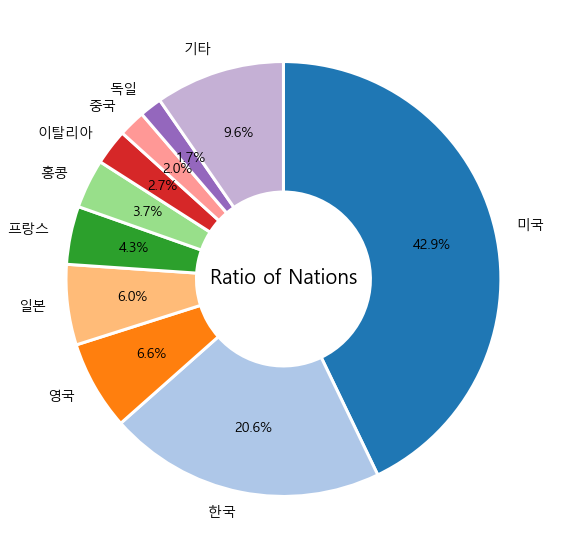

In [70]:
sr_nation = df.explode('nation')['nation'].value_counts()
others = sr_nation[9:].sum()
sr_nation = pd.concat([sr_nation[:9], pd.Series(others, index=['기타'])])

color = cm.tab20.colors
plt.figure(figsize=(10, 10), facecolor='white')
plt.pie(sr_nation, labels=sr_nation.index, labeldistance=1.1, wedgeprops={'linewidth': 3, 'edgecolor': 'white', 'width': 0.6}, textprops={'size': 14}, autopct='%.1f%%', pctdistance=0.7, startangle=90, counterclock=False, colors=color)
plt.title('Ratio of Nations', size=20, y=0.48)
plt.draw()

### Venn Diagram

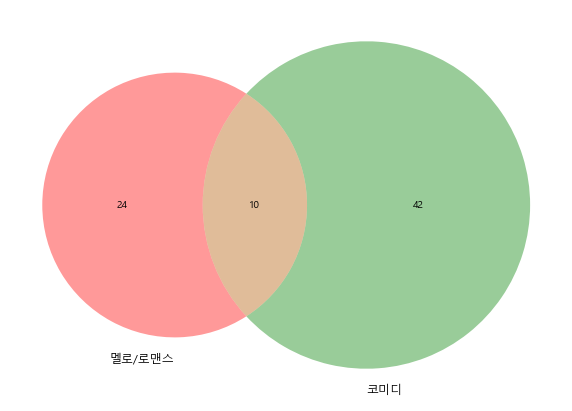

In [71]:
df_genre = df.explode('genre')[['title_kor', 'genre']].groupby('genre').agg(lambda x: set(x.to_list()))
genre_selection = ['멜로/로맨스', '코미디']

plt.figure(figsize=(10, 10), facecolor='white')
venn.venn2(df_genre.loc[genre_selection, 'title_kor'].to_list(), genre_selection)
plt.draw()

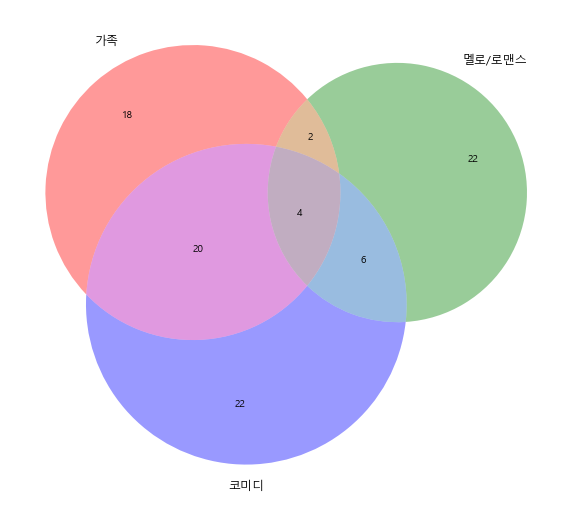

In [73]:
df_genre = df.explode('genre')[['title_kor', 'genre']].groupby('genre').agg(lambda x: set(x.to_list()))
genre_selection = ['가족', '멜로/로맨스', '코미디']

plt.figure(figsize=(10, 10), facecolor='white')
venn.venn3(df_genre.loc[genre_selection, 'title_kor'].to_list(), genre_selection)
plt.draw()

### Box Plot & Violin Plot

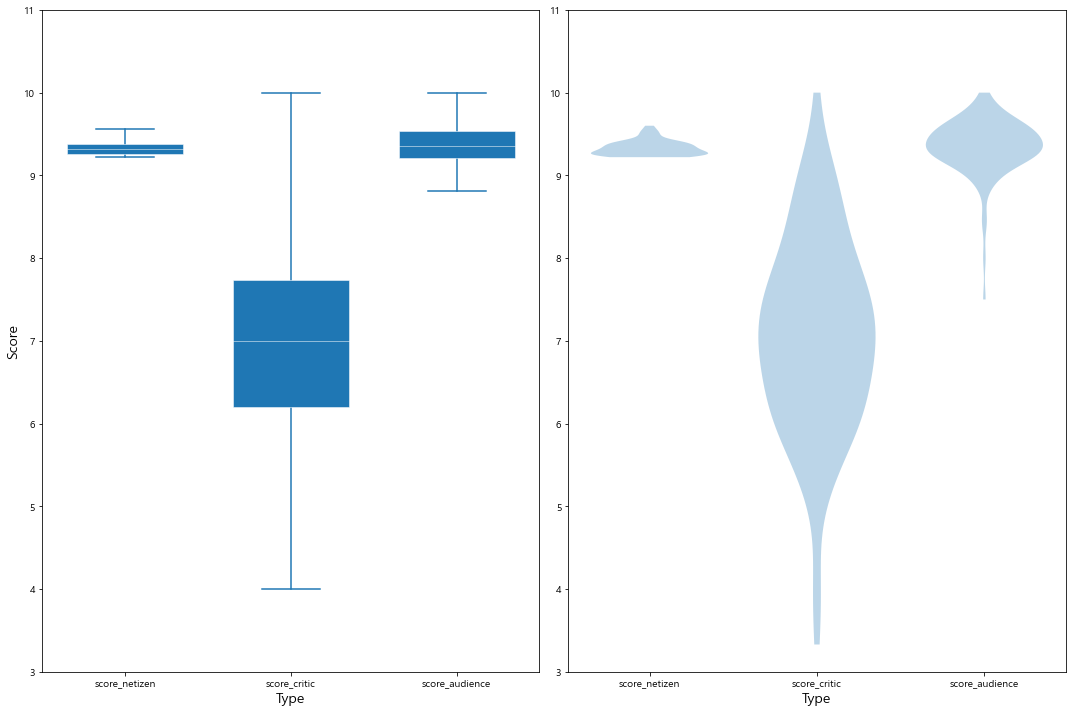

In [76]:
df_score = df[['score_netizen', 'score_critic', 'score_audience']].dropna()
df_score = df_score.astype(float)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
# plt.boxplot(df_score.to_numpy())
plt.boxplot(df_score.to_numpy(), positions=[0, 1, 2], widths=0.7, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
plt.xticks(range(3), df_score.columns)
plt.xlabel('Type', fontsize=14)
plt.ylim(3, 11)
plt.ylabel('Score', fontsize=14)
plt.subplot(1, 2, 2)
plt.violinplot(df_score.to_numpy(), positions=[0, 1, 2], widths=0.7,
                showmeans=False, showmedians=False, showextrema=False)
plt.xticks(range(3), df_score.columns)
plt.xlabel('Type', fontsize=14)
plt.ylim(3, 11)
# plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.draw()

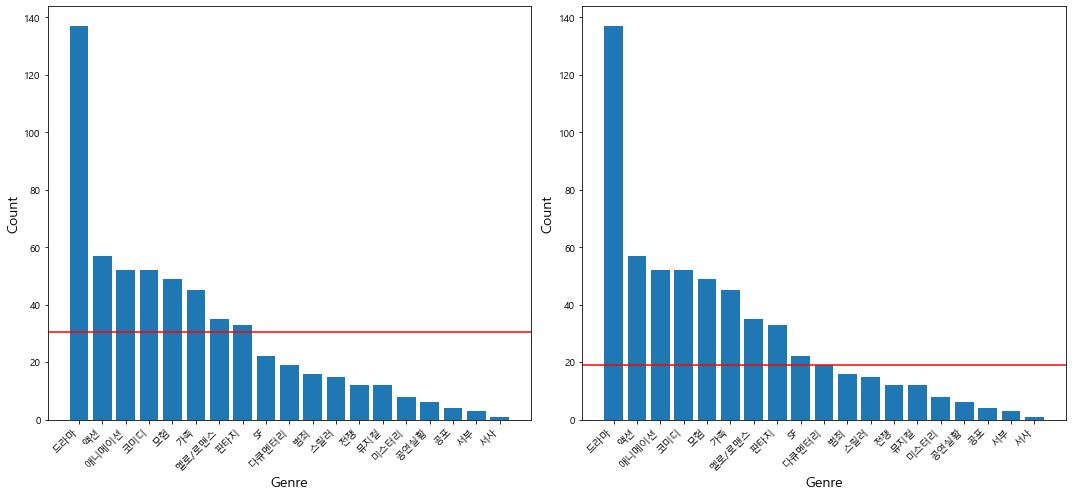

In [80]:
# multi subplots
df_genre = df.explode('genre')
sr_counts = df_genre['genre'].value_counts()

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.bar(range(19), sr_counts)
plt.axhline(sr_counts.mean(), color='red')
plt.xticks(range(19), sr_counts.index, rotation=45, ha='right')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.subplot(1, 2, 2)
plt.bar(range(19), sr_counts)
plt.axhline(sr_counts.median(), color='red')
plt.xticks(range(19), sr_counts.index, rotation=45, ha='right')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.draw()

### Word Cloud

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 39499 from 7500 sents. mem=0.271 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=88072, mem=0.286 Gb
[Noun Extractor] batch prediction was completed for 12567 words
[Noun Extractor] checked compounds. discovered 2768 compounds
[Noun Extractor] postprocessing detaching_features : 6246 -> 5377
[Noun Extractor] postprocessing ignore_features : 5377 -> 5290
[Noun Extractor] postprocessing ignore_NJ : 5290 -> 5245
[Noun Extractor] 5245 nouns (2768 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.305 Gb                    
[Noun Extractor] 58.18 % eojeols are covered


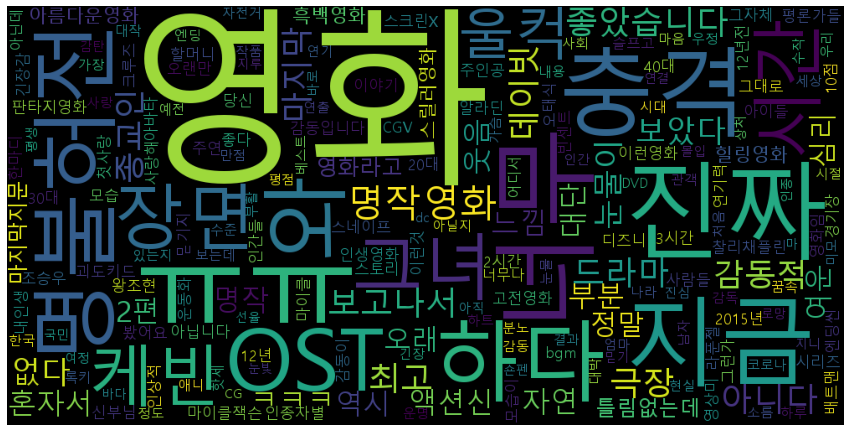

In [85]:
noun_extractor = LRNounExtractor_v2()
nouns = noun_extractor.train_extract(df_comment['comment'])
comments = ' '.join(nouns)

wordcloud = WordCloud(
    font_path = font_path,
    background_color = 'black',
    stopwords = ['영화입니다','영화였습니다'],
    width = 1000, height = 500).generate(comments)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.draw()

### Tree Map

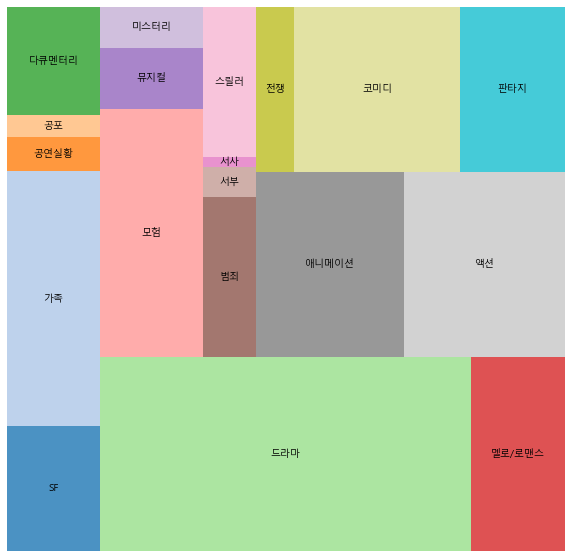

In [86]:
df_genre = pd.DataFrame(df.explode('genre').groupby('genre').count()['id_movie'])

# color = [np.random.choice(np.linspace(0, 1, 18), 3) for i in range(18)]
color = cm.tab20.colors
plt.figure(figsize=(10, 10))
squarify.plot(sizes=df_genre['id_movie'], label=df_genre.index, alpha=0.8, color=color)
plt.axis('off')
plt.draw()